In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
churn_no = df[df['Churn'] == "No"]
churn_yes = df[df['Churn'] == "Yes"]

In [24]:
#Question 1(a)
demographics = df[['customerID','gender', 'SeniorCitizen', 'Partner', 'Dependents','Churn']]
demographics

,customerID,gender,SeniorCitizen,Partner,Dependents,Churn
0,7590-VHVEG,Female,0,Yes,No,No
1,5575-GNVDE,Male,0,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes
3,7795-CFOCW,Male,0,No,No,No
4,9237-HQITU,Female,0,No,No,Yes
...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,No
7039,2234-XADUH,Female,0,Yes,Yes,No
7040,4801-JZAZL,Female,0,Yes,Yes,No
7041,8361-LTMKD,Male,1,Yes,No,Yes


Text(0.5, 1.0, 'Churn by Gender')

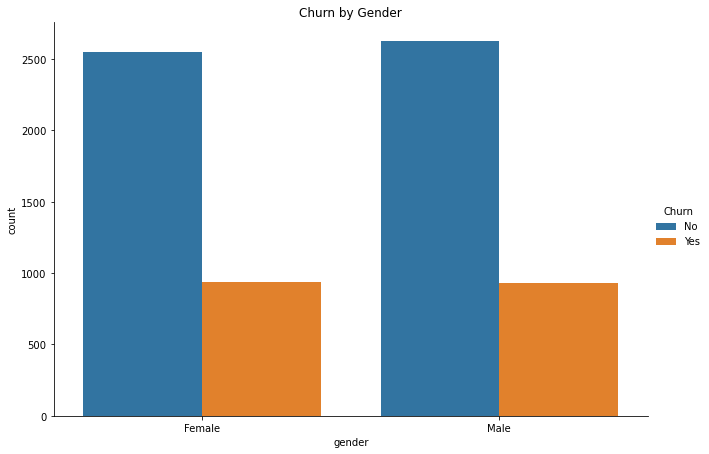

In [29]:
axs=sns.catplot(x="gender", hue="Churn", data=demographics, kind='count',height=6, aspect=9/6)
plt.title ('Churn by Gender')


Text(0.5, 1.0, 'Churn by Senior Citizen')

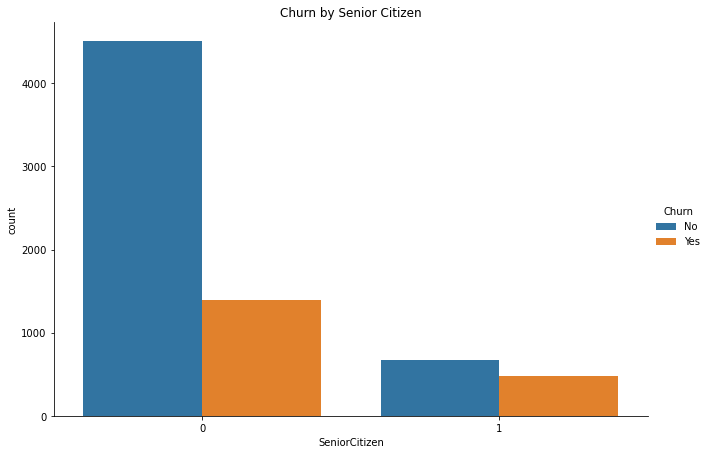

In [28]:
ax=sns.catplot(x="SeniorCitizen", hue="Churn", data=demographics, kind='count',height=6, aspect=9/6)
plt.title ('Churn by Senior Citizen')

Text(0.5, 1.0, 'Churn by Partner')

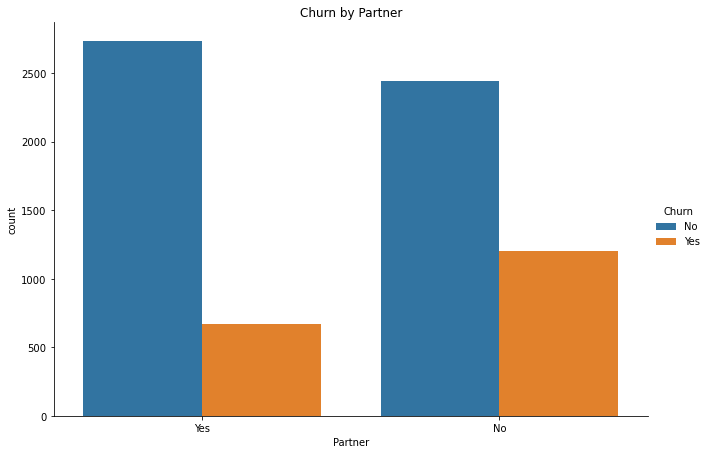

In [30]:
ax=sns.catplot(x="Partner", hue="Churn", data=demographics, kind='count',height=6, aspect=9/6)
plt.title ('Churn by Partner')

Text(0.5, 1.0, 'Churn by Dependents')

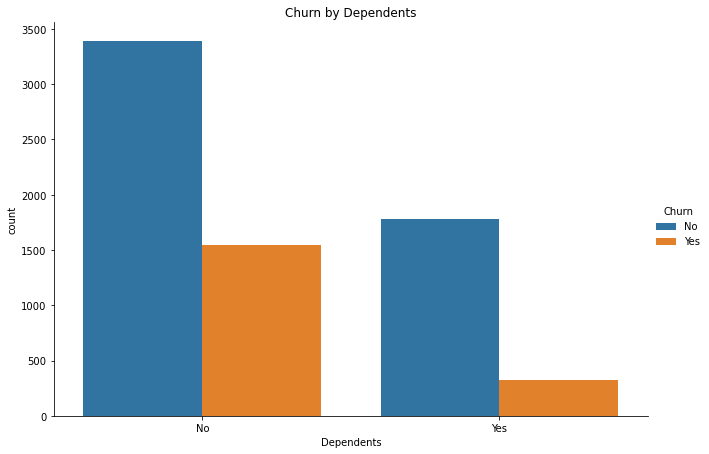

In [31]:
ax=sns.catplot(x="Dependents", hue="Churn", data=demographics, kind='count',height=6, aspect=9/6)
plt.title ('Churn by Dependents')

In [ ]:
The most popular demographics are senior citizens and dependents.

In [ ]:
#Question 1(b)
Young people were the most popular customers with senior citizen being low.
The marketing team should focus their efforts on the young people of both gender.

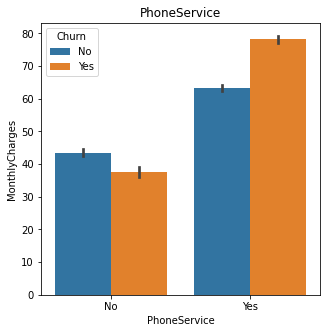

In [35]:
#Question 2(a)

services = ['PhoneService'] 

for service in services:
    plt.gcf().set_size_inches (5,5, forward = True)
    sns.barplot (x= service ,  y= 'MonthlyCharges', data =df, hue = "Churn")
    plt.title (service)
    plt.show()

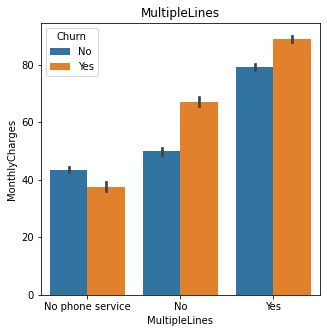

In [42]:
 services = ['MultipleLines'] 

for service in services:
    plt.gcf().set_size_inches (5,5, forward = True)
    sns.barplot (x= service ,  y= 'MonthlyCharges', data =df, hue = "Churn")
    plt.title (service)
    plt.show()
    

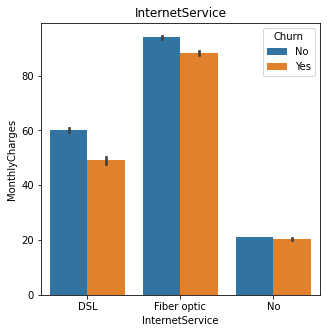

In [36]:
services = ['InternetService'] 

for service in services:
    plt.gcf().set_size_inches (5,5, forward = True)
    sns.barplot (x= service ,  y= 'MonthlyCharges', data =df, hue = "Churn")
    plt.title (service)
    plt.show()

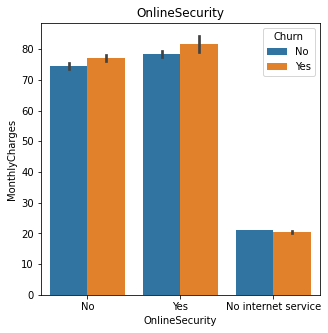

In [37]:
services = ['OnlineSecurity'] 

for service in services:
    plt.gcf().set_size_inches (5,5, forward = True)
    sns.barplot (x= service ,  y= 'MonthlyCharges', data =df, hue = "Churn")
    plt.title (service)
    plt.show()

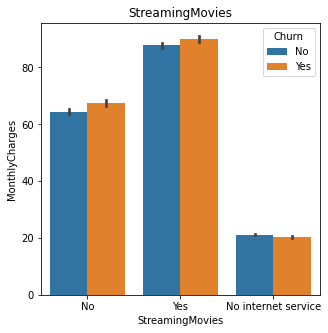

In [41]:
services = ['StreamingMovies'] 

for service in services:
    plt.gcf().set_size_inches (5,5, forward = True)
    sns.barplot (x= service ,  y= 'MonthlyCharges', data =df, hue = "Churn")
    plt.title (service)
    plt.show()

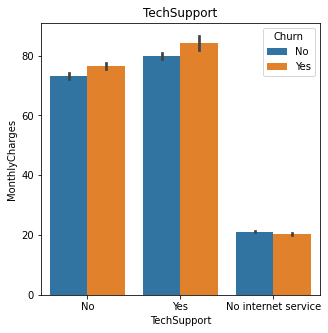

In [39]:
services = ['TechSupport'] 

for service in services:
    plt.gcf().set_size_inches (5,5, forward = True)
    sns.barplot (x= service ,  y= 'MonthlyCharges', data =df, hue = "Churn")
    plt.title (service)
    plt.show()

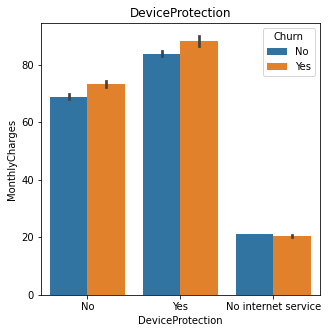

In [38]:
services = ['DeviceProtection'] 

for service in services:
    plt.gcf().set_size_inches (5,5, forward = True)
    sns.barplot (x= service ,  y= 'MonthlyCharges', data =df, hue = "Churn")
    plt.title (service)
    plt.show()

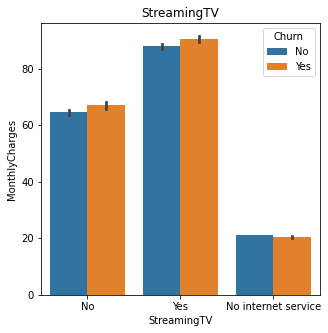

In [40]:
services = ['StreamingTV'] 

for service in services:
    plt.gcf().set_size_inches (5,5, forward = True)
    sns.barplot (x= service ,  y= 'MonthlyCharges', data =df, hue = "Churn")
    plt.title (service)
    plt.show()

In [ ]:
Device Protection, Streaming TV and Streaming Movies are the 3 servuces contributing to a higher monthly charge

In [12]:
#Question 2(b)
phone_service = churn_no[churn_no['PhoneService'] == "Yes"]
phone_service.groupby('Contract')["Churn"].count()

Contract
Month-to-month    1997
One year          1176
Two year          1489
Name: Churn, dtype: int64

In [ ]:
 Month-to-month contract

In [22]:
#Question 3(a)
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
basic: 35.50 
plus:70.35
premium:89.85

In [47]:
#Question 3(b)
paperless = pd.crosstab(df.PaperlessBilling,df.Churn)
paperless

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


<AxesSubplot:xlabel='Churn', ylabel='Count'>

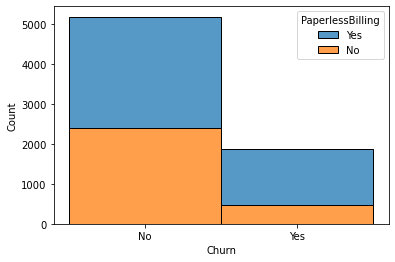

In [53]:
sns.histplot(df, x="Churn", hue="PaperlessBilling", multiple="stack")

In [ ]:
The company should not go paperless since Paperless Billing had the lowest churn. 
